In [1]:
from wraptrain import ReadImage,OriginModNetDataLoader,ImageMatteLoader,ModNetImageGenerator,NetTrainer
base_path = "/mnt/data/human/Test/"
fg = base_path+"Comp"
matte= base_path+"Alpha"
files = ReadImage(fg,matte).read_same_names()
from wrapown import  OwnNetTrainer
from src.models.v2 import FiniteNet

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-05 19:33:27.312092: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 19:33:27.358703: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 19:33:27.358732: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 19:33:27.358760: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alrea

In [11]:
files.shape

(2250, 2)

In [2]:
all_data = OriginModNetDataLoader(files,[512,512],hot_path=base_path+"newHeatmaps.pt")

In [8]:
show_data = ImageMatteLoader(files)

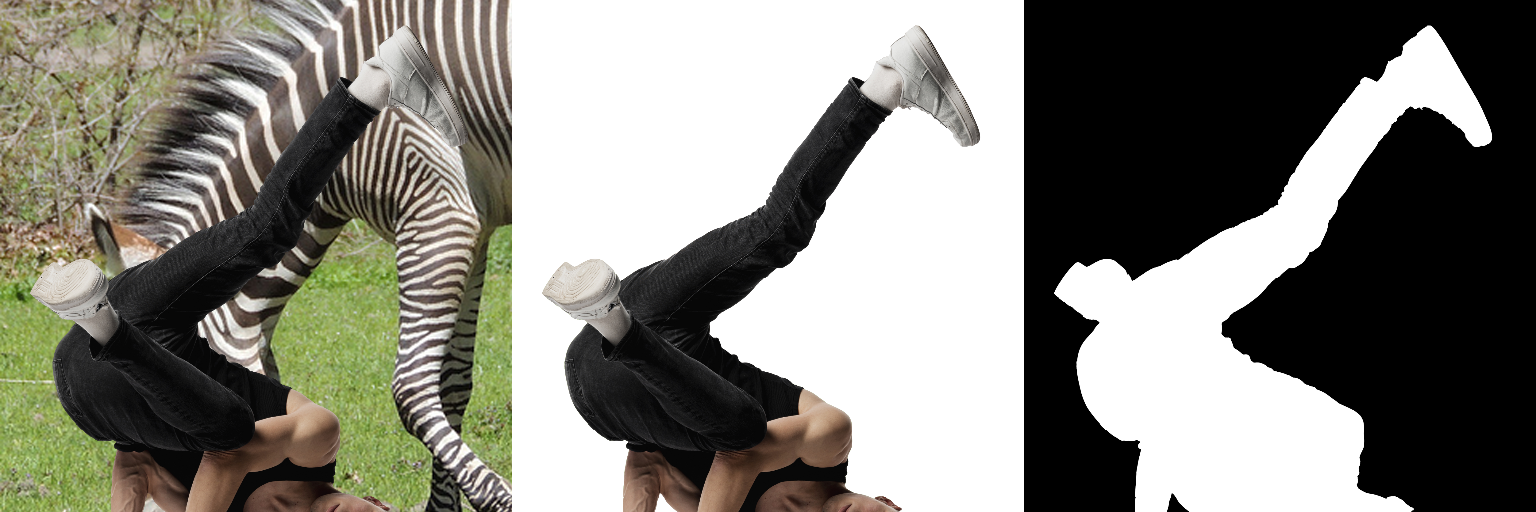

(<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=L size=512x512>)

In [12]:
show_data.show(2100,[512,512])

In [6]:
import torch
t = FiniteNet().cuda()
t(torch.rand([1,3,512,512]).cuda())

(None,
 tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [3.5200e+02, 2.2400e+02, 3.0155e-02],
          [0.0000e+00, 6.4000e+01, 1.8785e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [6.4000e+01, 1.6000e+02, 2.7352e-01],
          [1.9200e+02, 4.1600e+02, 1.5888e-01],
          [1.2800e+02, 3.2000e+02, 2.9678e-02],
          [4.8000e+02, 1.6000e+02, 3.4650e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [2.5600e+02, 3.2000e+01, 6.6452e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]]], device='cuda:0',
        grad_fn=<CopySlices>),
 tensor([[[[0.5978, 0.5923, 0.5813,  ..., 0.6009, 0.6014, 0.6016],
           [0.6126, 0.6053, 0.5907,  ..., 0.6073, 0.6099, 0.

In [ ]:
#begin_dream = OwnNetTrainer(model,ckpt_path="tests/checkpoint_5.pth")
begin_dream = OwnNetTrainer(FiniteNet())
all_data.show_with_key(idx=12,model=begin_dream.get_model())
fuck= ModNetImageGenerator(files,begin_dream.get_model())
fuck.show(12,[512,512])

In [ ]:
begin_dream.train_with_key(all_data,epochs=500,checkpoint_dir="v2tests",batch_size=2)

In [ ]:
see = ImageMatteLoader(files)
see.show(12,[512,512])
